# Import Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Linear SVM Classification

### Linear Kernel $ f(X) = w^T \times X + b $

### At the decision boundary $ w_{0} \times x_{0} + w_{1} \times x_{1} + b = 0 $

### At the decision boundary $ x_{1} =  \frac{-w_{0}}{w_{1}} \times x_{0} - \frac{b}{w_{1}} $

In [3]:
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

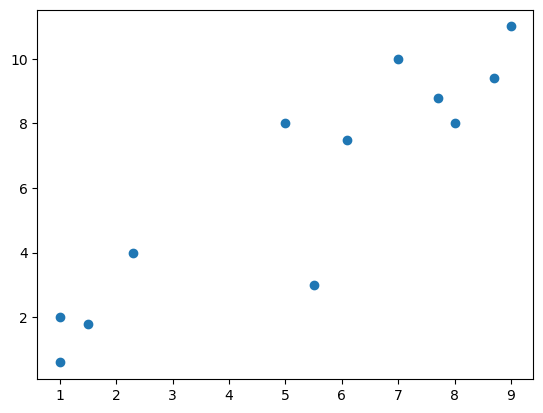

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
X_train = np.vstack((X, y)).T
y_train = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [6]:
clf = SVC(kernel='linear', C=1)

In [7]:
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax, scaled=False):
    x0 = np.linspace(xmin, xmax, 13)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    decision_boundary = (-w[0] / w[1]) * x0 - (b / w[1])
    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-')
    if scaled:
        plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)
    else:
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

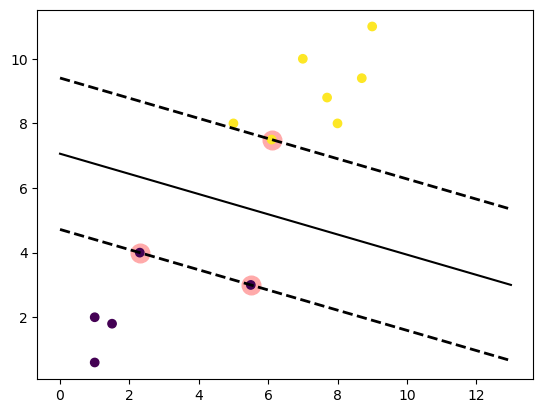

In [9]:
plot_svc_decision_boundary(clf, 0, 13)

# Soft Margine Vs Hard Margine

In [10]:
X_outliers = np.array([[3.4, 13]])
y_outliers = np.array([0])
X_train = np.concatenate([X_train, X_outliers], axis=0)
y_train = np.concatenate([y_train, y_outliers], axis=0)

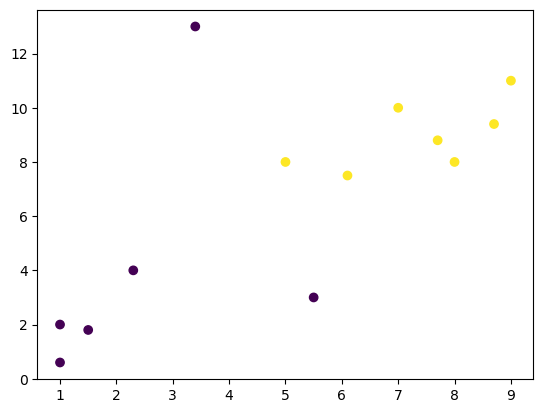

In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

In [12]:
clf_soft = SVC(kernel='linear', C=1)

In [13]:
clf_soft.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [14]:
clf_hard = SVC(kernel='linear', C=10**9)

In [15]:
clf_hard.fit(X_train, y_train)

SVC(C=1000000000, kernel='linear')

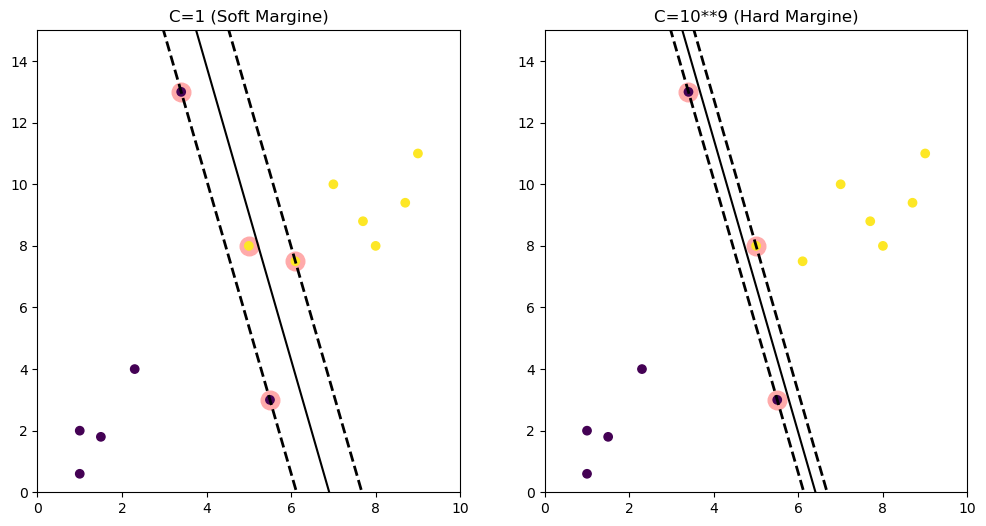

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2 , 1)
plot_svc_decision_boundary(clf_soft, 0, 13)
plt.title("C=1 (Soft Margine)")
plt.axis([0, 10, 0, 15])
plt.subplot(1, 2 , 2)
plot_svc_decision_boundary(clf_hard, 0, 13)
plt.title("C=10**9 (Hard Margine)")
plt.axis([0, 10, 0, 15])
plt.show()

# Sensitivity to Feature Scales

In [17]:
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

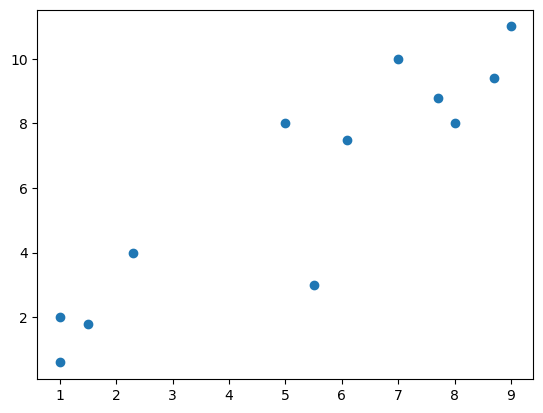

In [18]:
plt.scatter(X, y)
plt.show()

In [19]:
X_train = np.vstack((X, y)).T
y_train = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)

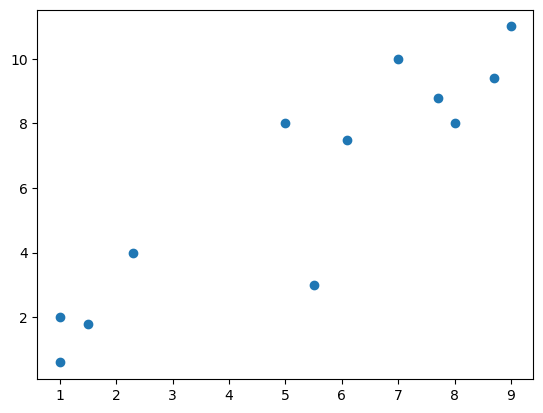

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

In [23]:
clf_scaled = SVC(kernel='linear', C=1)

In [24]:
clf_scaled.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

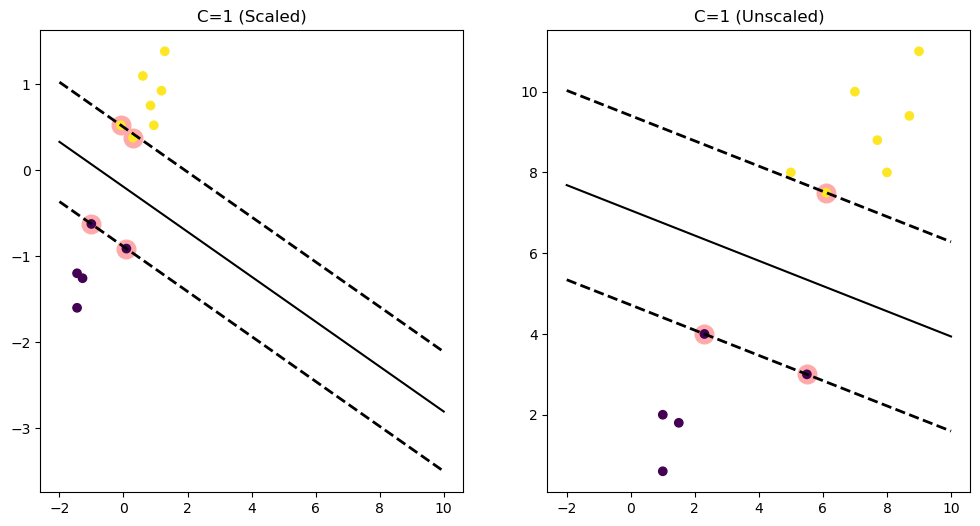

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2 , 1)
plot_svc_decision_boundary(clf_scaled, -2, 10, True)
plt.title("C=1 (Scaled)")
plt.subplot(1, 2 , 2)
plot_svc_decision_boundary(clf, -2, 10)
plt.title("C=1 (Unscaled)")
plt.show()

# Non-Linear SVM Classification

>### Polynomial Kernel

In [26]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

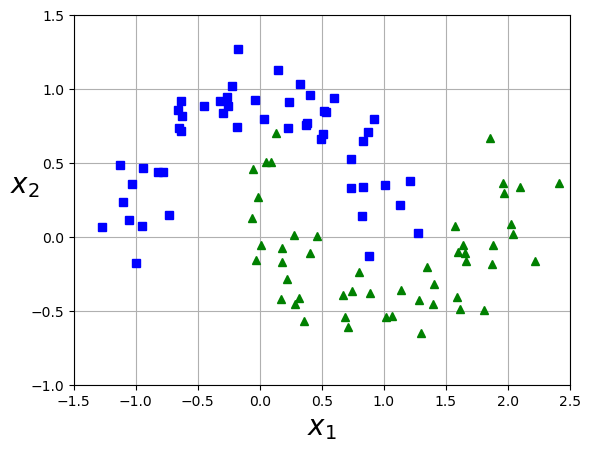

In [27]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [28]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [29]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

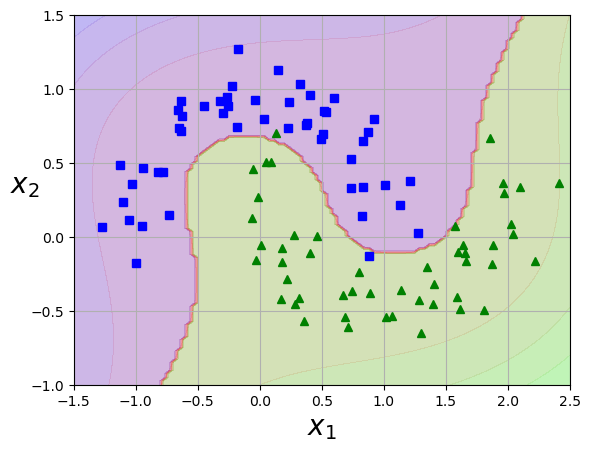

In [30]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

>### RBF Kernel

In [31]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

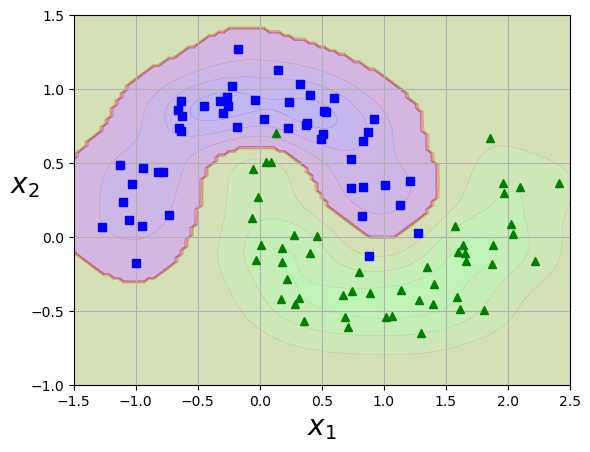

In [32]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Read Data

In [33]:
cancer = load_breast_cancer()

In [34]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [36]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [37]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [38]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [39]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [40]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

# Data Standardization

In [42]:
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)

In [44]:
X_test_scaled = scaler.transform(X_test)

# Creating The Model

In [45]:
model = SVC()

In [46]:
model.fit(X_train_scaled,y_train)

SVC()

In [47]:
predictions = model.predict(X_test_scaled)

In [48]:
print(confusion_matrix(y_test,predictions))

[[ 64   2]
 [  1 104]]


In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.98      0.99      0.99       105

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# Grid Search

In [50]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 

In [51]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=3)

In [52]:
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.962 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.962 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.632 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.636 total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.910 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.932 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.910 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [54]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [55]:
grid_predictions = grid.predict(X_test_scaled)

In [56]:
print(confusion_matrix(y_test,grid_predictions))

[[ 64   2]
 [  0 105]]


In [57]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.98      1.00      0.99       105

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171

